In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, Ridge

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
df = pd.read_csv('otomoto_price_prediction_data.csv')

In [4]:
df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0


In [6]:
df.shape

(206207, 11)

# EDA

In [5]:
df.describe()

,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,target_price
count,206207.000000,2.048530e+05,204029.000000,204628.000000,206207.000000,206207.000000,2.062070e+05
mean,2012.313855,6.656787e+05,1865.096922,151.300301,0.038059,0.600038,6.273519e+04
std,6.453940,2.040768e+08,708.559717,76.915073,0.191339,0.489891,8.604596e+04
min,1917.000000,1.000000e+00,400.000000,1.000000,0.000000,0.000000,6.000000e+02
25%,2008.000000,4.500000e+04,1461.000000,105.000000,0.000000,0.000000,1.799900e+04
50%,2013.000000,1.378500e+05,1797.000000,136.000000,0.000000,1.000000,3.590000e+04
75%,2017.000000,1.990000e+05,1997.000000,170.000000,0.000000,1.000000,7.490000e+04
max,2021.000000,9.060612e+10,8400.000000,1500.000000,1.000000,1.000000,5.250000e+06


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

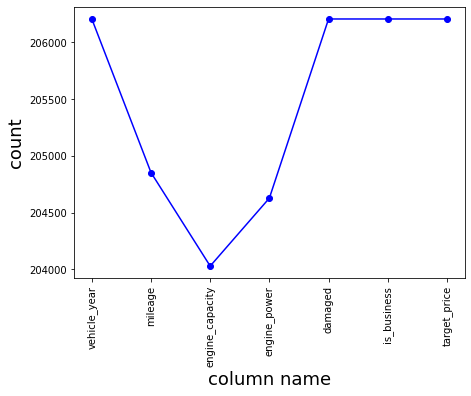

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(df.describe().loc['count',:],'bo-')
ax.set_xlabel('column name', fontsize = 18)
ax.set_ylabel('count', fontsize = 18)
plt.xticks(rotation=90 )

Seem to be missing data in mileage, engine_capacity and engine_power. Though amount of missing data does not seem to be much compared to the total size of the data

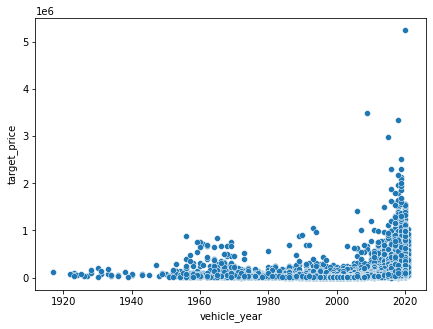

In [8]:
plt.subplots(figsize = (7,5))
sns.scatterplot(data = df, x = 'vehicle_year', y = 'target_price' )

In general newer vehicles seem to be having higher prices. But no absolute clear trend here.

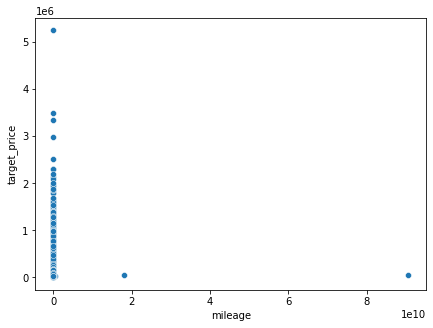

In [9]:
plt.subplots(figsize = (7,5))
sns.scatterplot(data = df, x = 'mileage', y = 'target_price' )

Milegae seems to be having some very extreme values which may be outliers. 

In [10]:
df2 = df[df['mileage'] < 1.5]

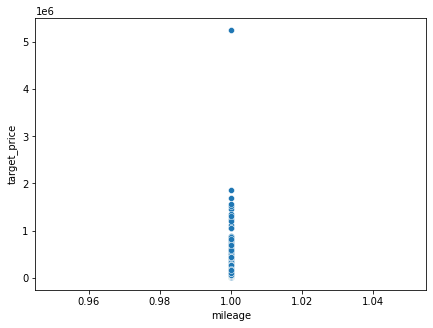

In [11]:
plt.subplots(figsize = (7,5))
sns.scatterplot(data = df2, x = 'mileage', y = 'target_price' )

In general mileage in near to 1 and very few vehicles have huge target price for mileage 1

In [12]:
df['engine_capacity'].nunique()

1194

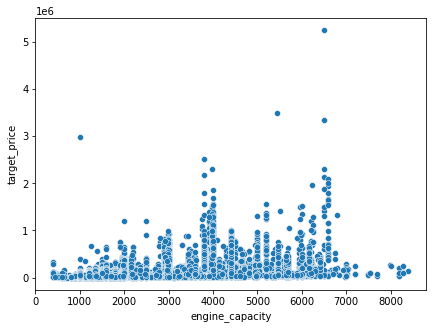

In [13]:
plt.subplots(figsize = (7,5))
sns.scatterplot(data = df, x = 'engine_capacity', y = 'target_price' )

Higher engine capacity seems to lead to higher target price but no very clear proof of it.

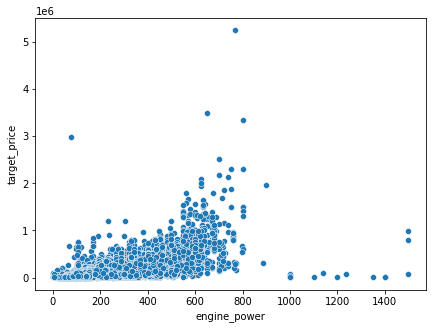

In [14]:
plt.subplots(figsize = (7,5))
sns.scatterplot(data = df, x = 'engine_power', y = 'target_price' )

too high or too low engine power does not seem to lead to higher price. engine power in the range of 600 to 800 seems to be leading to higher prices.

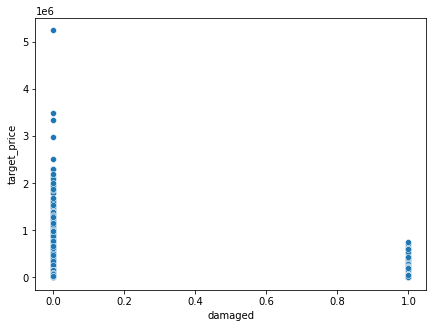

In [15]:
plt.subplots(figsize = (7,5))
sns.scatterplot(data = df, x = 'damaged', y = 'target_price' )

damaged cars seem to decrese the price dramatically.

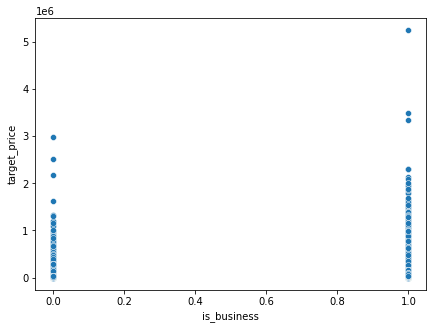

In [16]:

plt.subplots(figsize = (7,5))
sns.scatterplot(data = df, x = 'is_business', y = 'target_price' )

In general business vehicles seem to be having higher prices.

In [17]:
df['make'].nunique()

108

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]), <a list of 108 Text major ticklabel objects>)

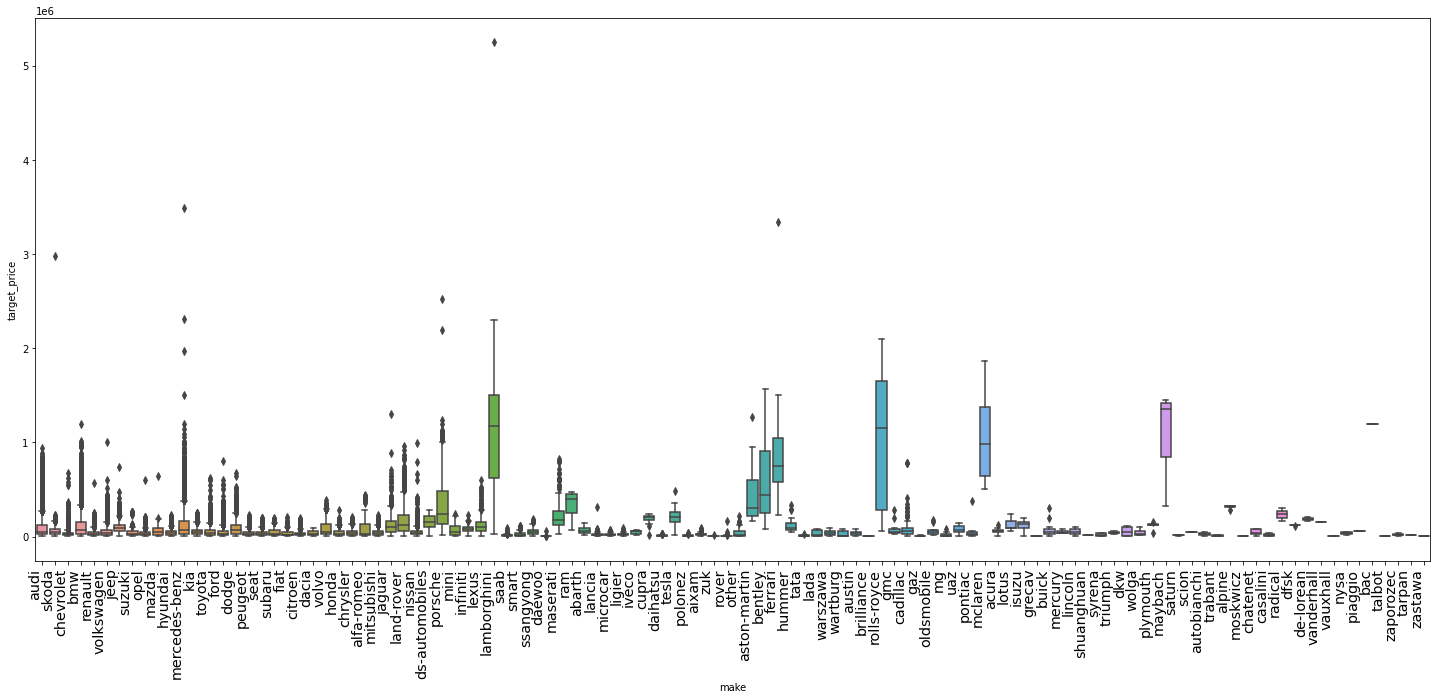

In [18]:
plt.figure(figsize = (25,10))
ax = sns.boxplot(data = df, x = 'make', y = 'target_price' )
plt.xticks(rotation=90, horizontalalignment='right',fontweight='light', fontsize='x-large')


In [19]:
make_wise_count = df.groupby('make').count()['target_price']

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]), <a list of 108 Text major ticklabel objects>)

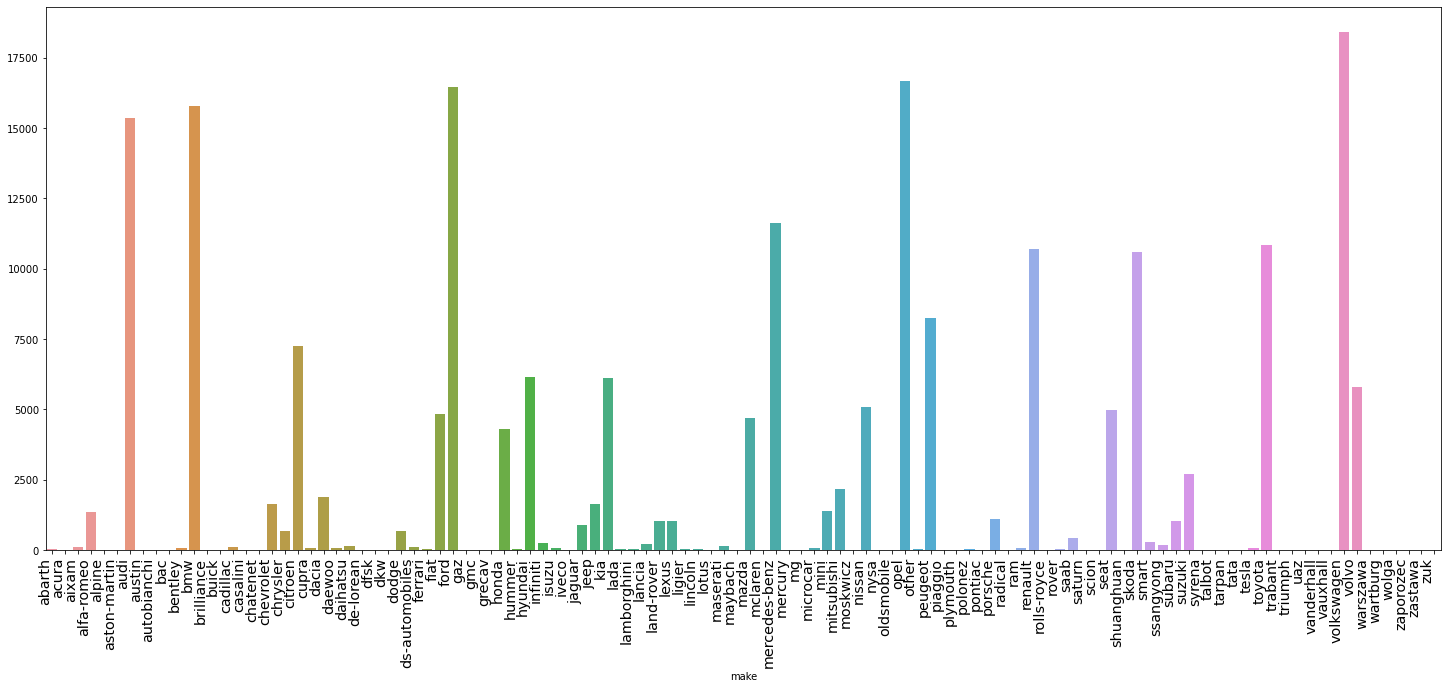

In [20]:
plt.figure(figsize = (25,10))
sns.barplot(x = make_wise_count.index, y = make_wise_count.values)
plt.xticks(rotation=90, horizontalalignment='right',fontweight='light', fontsize='x-large')

makes such as audi, bmw, fiat, ford, hummer, hyundai, kia, marcedes-benzopel, peugeut, renault, skoda, suzuki, toyota, volkswagen and volvo have much higher count than others.

In [21]:
df['model'].nunique()

1165

In [22]:
df3 = df.groupby(['make', 'model']).count()

In [23]:
df3

vehicle_year  mileage  ...  is_business  target_price
make      model                                ...                           
abarth    500                      7        7  ...            7             7
          595                     24       24  ...           24            24
          695                      4        4  ...            4             4
          grande-punto            10       10  ...           10            10
acura     cl                       1        1  ...            1             1
...                              ...      ...  ...          ...           ...
wolga     other                    1        1  ...            1             1
zaporozec 965                      1        1  ...            1             1
          other                    1        1  ...            1             1
zastawa   1100                     1        1  ...            1             1
zuk       other                    4        4  ...            4             4

[1263 rows x 9 columns]

In [24]:
make_model_wise_count = df3['target_price']

Let's examine model counts of some predominant companies which we had filtered earlier.


In [25]:
audi_df = df3.loc['audi',:]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

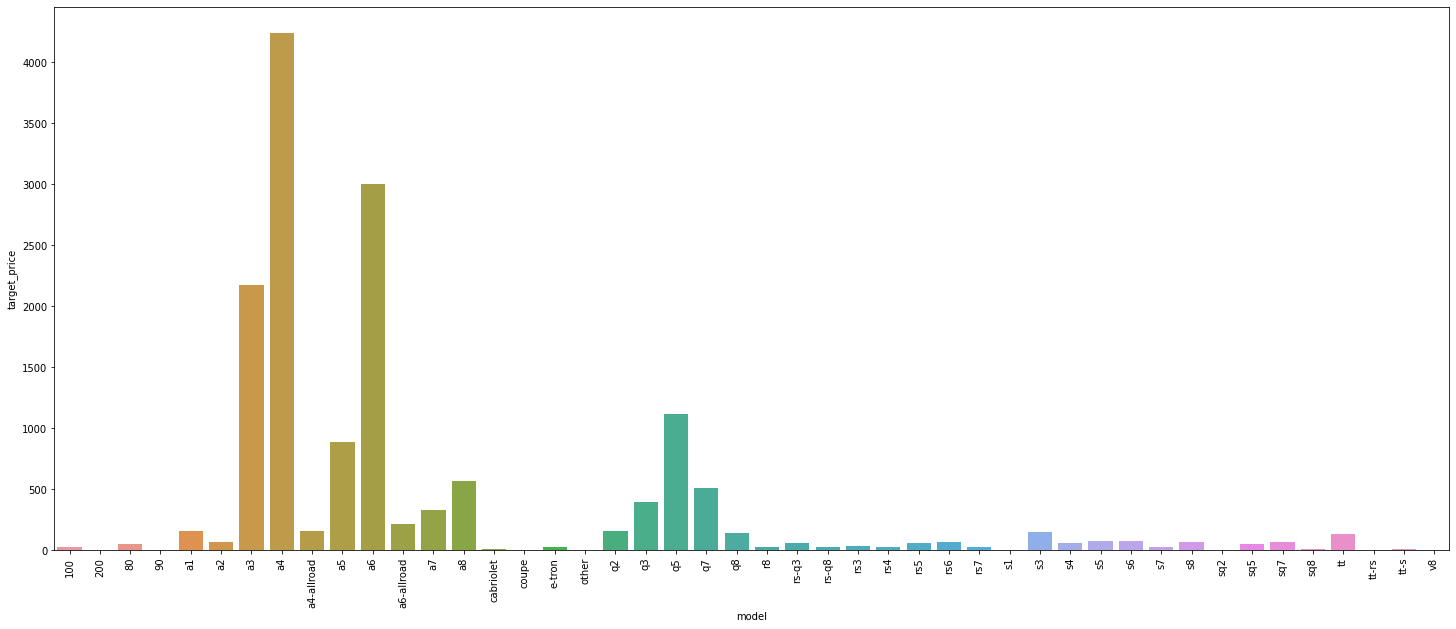

In [26]:
plt.figure(figsize = (25,10))
sns.barplot(data= audi_df, x = audi_df.index, y = 'target_price')
plt.xticks(rotation=90 )

Audi a3, a4 and a6 have greater target_price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

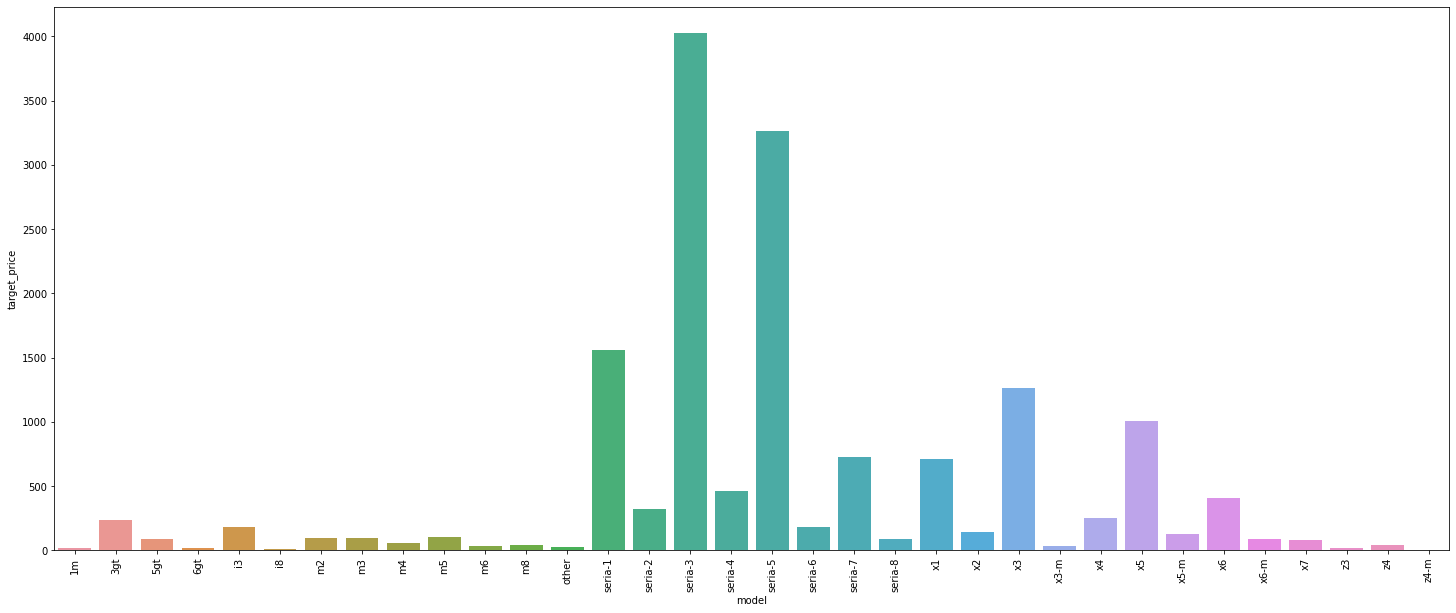

In [27]:
bmw_df = df3.loc['bmw',:]
plt.figure(figsize = (25,10))
sns.barplot(data= bmw_df, x = bmw_df.index, y = 'target_price')
plt.xticks(rotation=90 )

bmw, seria-3 and seria-5 have highest target price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text major ticklabel objects>)

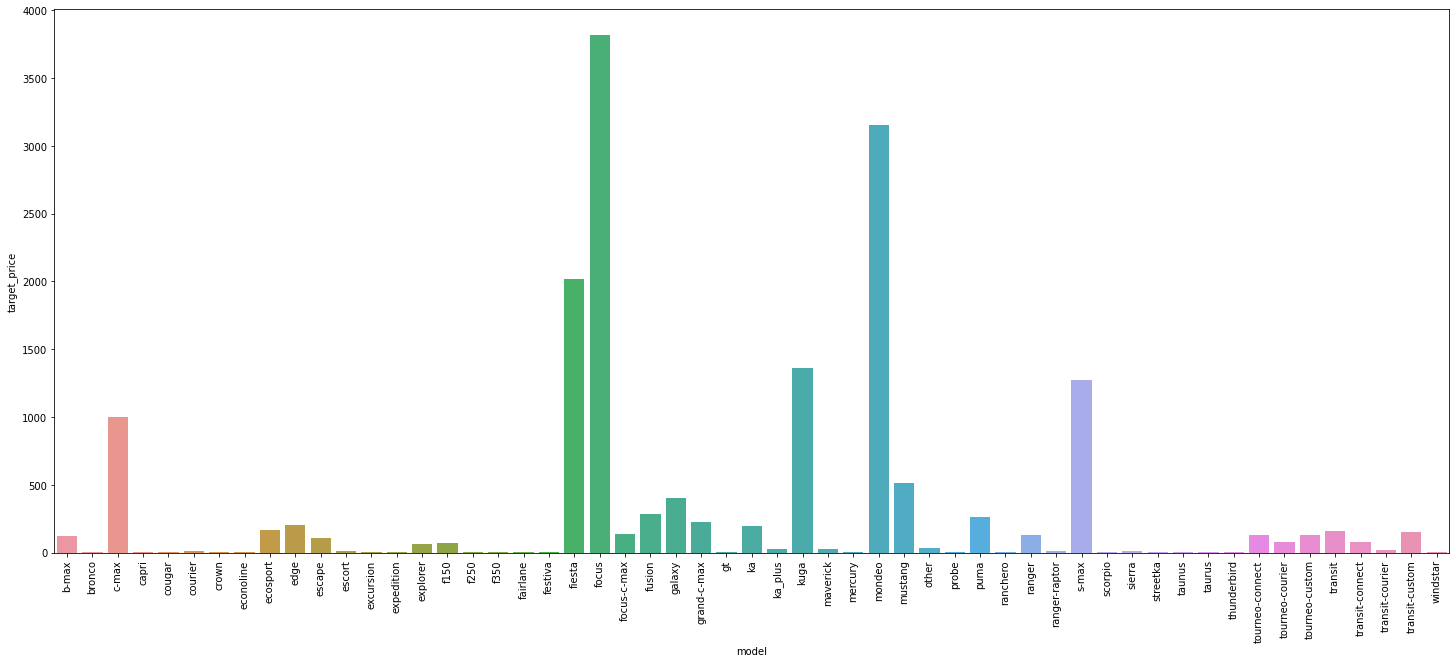

In [28]:
ford_df = df3.loc['ford',:]
plt.figure(figsize = (25,10))
sns.barplot(data= ford_df, x = ford_df.index, y = 'target_price')
plt.xticks(rotation=90 )

Ford focus, fiests and mondeo have high target price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

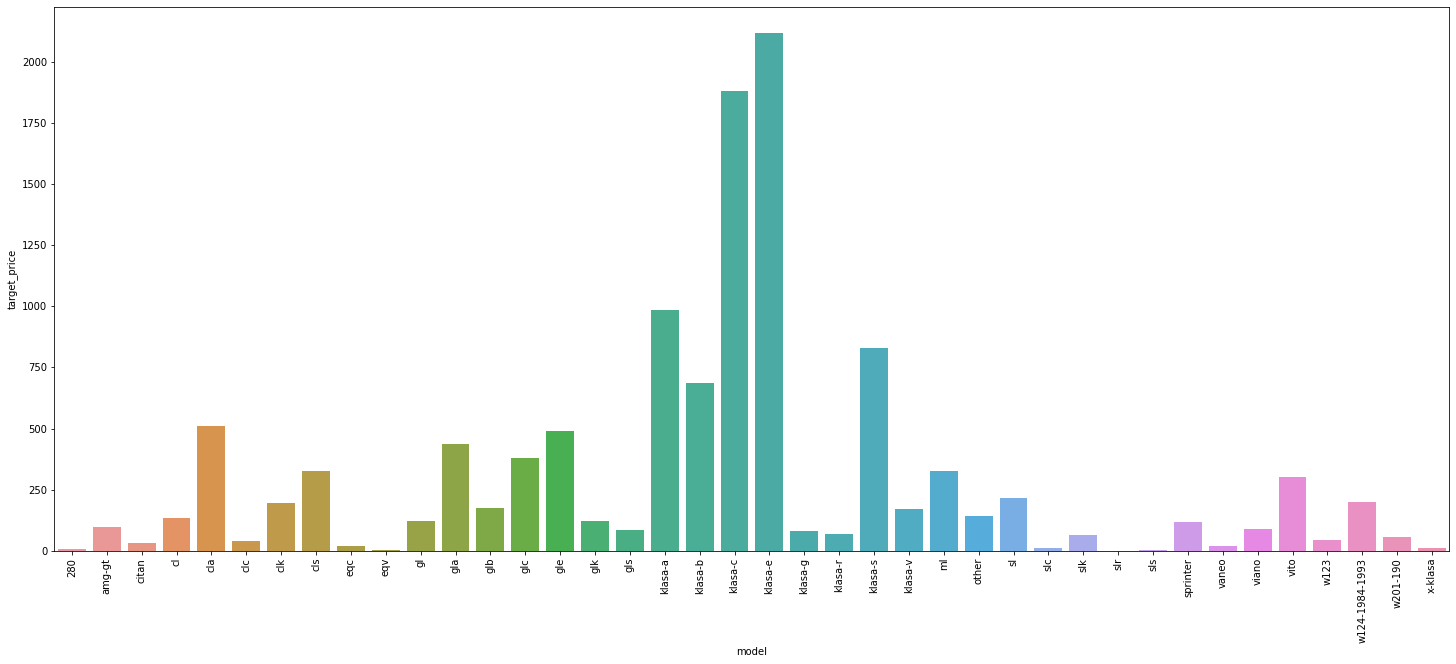

In [29]:
mer_df = df3.loc['mercedes-benz',:]
plt.figure(figsize = (25,10))
sns.barplot(data= mer_df, x = mer_df.index, y = 'target_price')
plt.xticks(rotation=90 )

Mercedes-Benz klasa-a, klasa-b, klasa-c,klasa-e have highest target price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

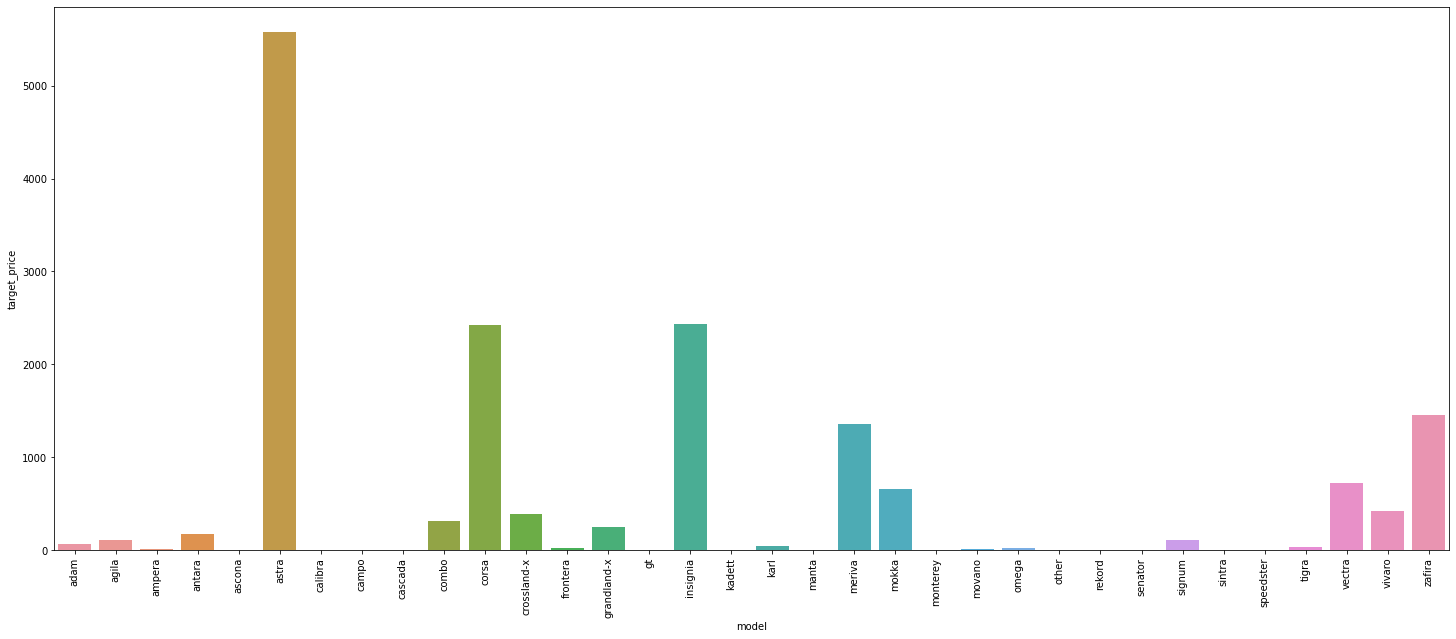

In [30]:
opel_df = df3.loc['opel',:]
plt.figure(figsize = (25,10))
sns.barplot(data= opel_df, x = opel_df.index, y = 'target_price')
plt.xticks(rotation=90 )

Opel astra, corsa,insignia have highest target_prices.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

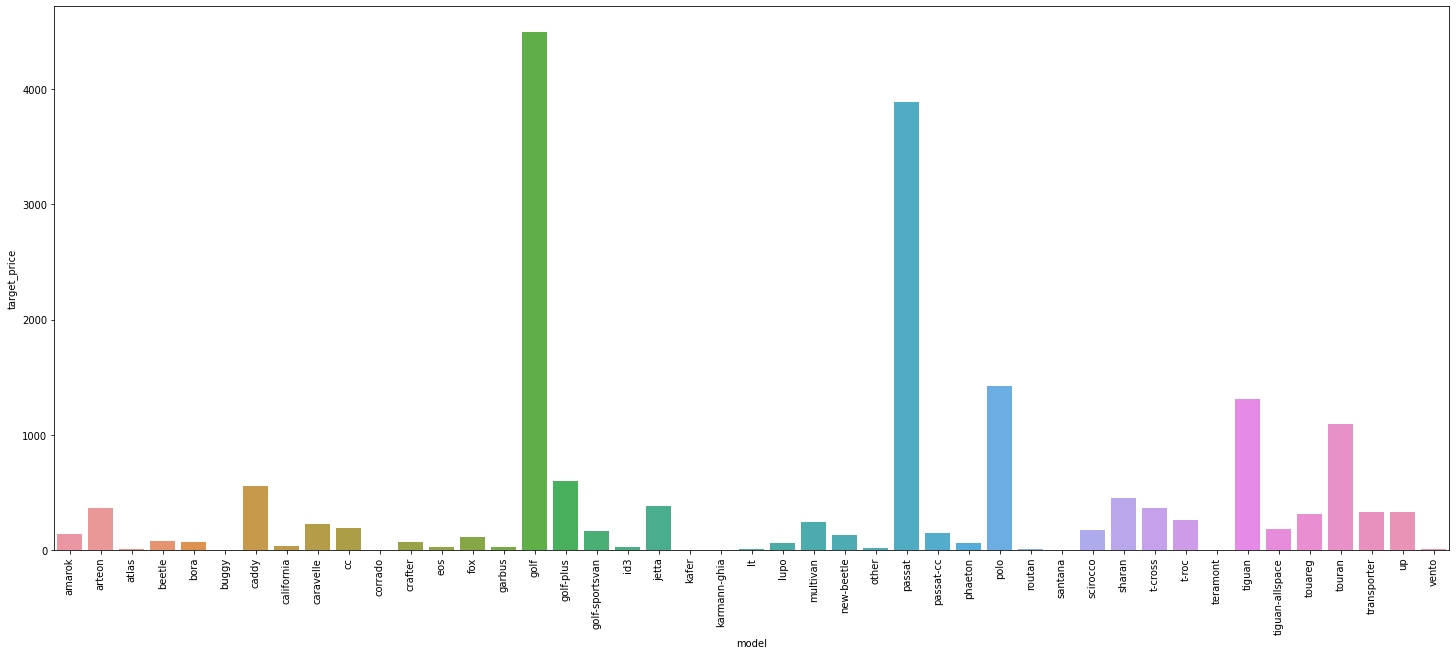

In [31]:
volk_df = df3.loc['volkswagen',:]
plt.figure(figsize = (25,10))
sns.barplot(data= volk_df, x = volk_df.index, y = 'target_price')
plt.xticks(rotation=90 )

Volkswagen golf, passat, polo have high target prices.

This way target prices of all the major makes and models can be checked 

In [32]:
df.head(1)

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

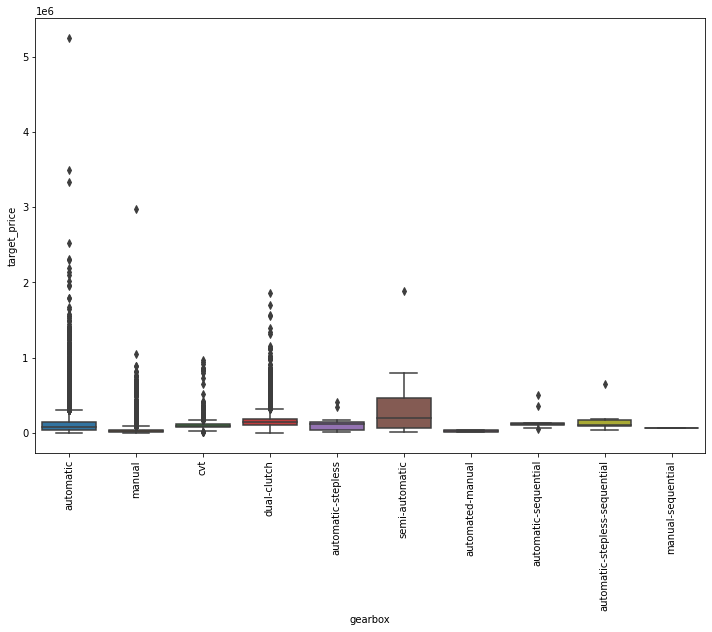

In [33]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'gearbox', y = 'target_price' )
plt.xticks(rotation=90 )

Automatic gear box has highest target_price followed by semi-automatic.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

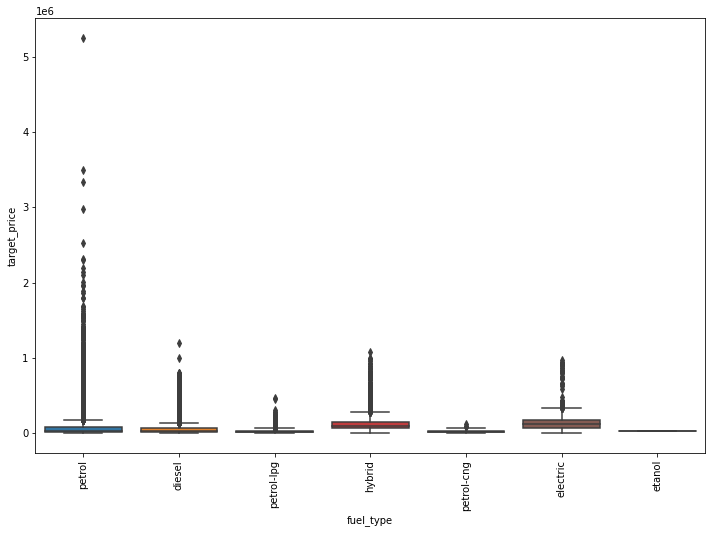

In [34]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'fuel_type', y = 'target_price' )
plt.xticks(rotation=90 )

Seems like too many outliers in 'fuel_type'.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

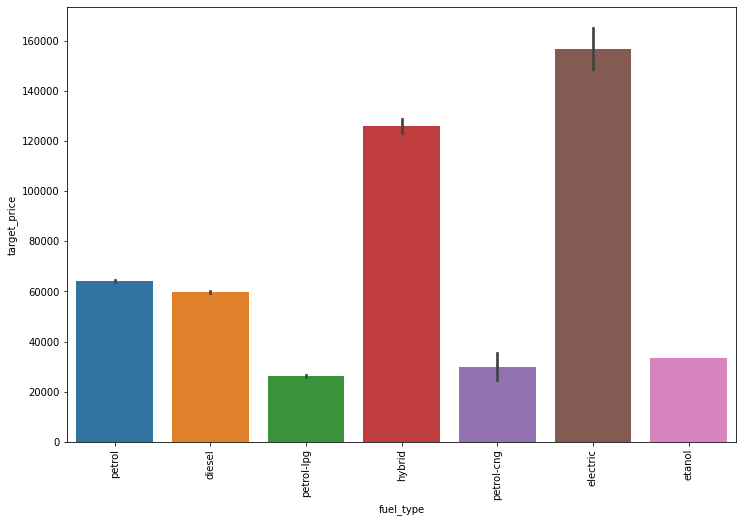

In [35]:
plt.figure(figsize = (12,8))
sns.barplot(data = df, x = 'fuel_type', y = 'target_price' )
plt.xticks(rotation=90 )

Electric vehicles have gighest target_price followed by petrol and diesel.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

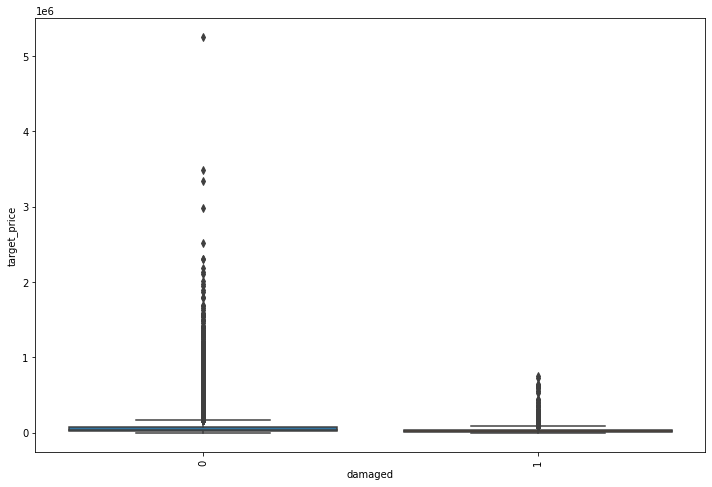

In [36]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'damaged', y = 'target_price' )
plt.xticks(rotation=90 )

Damaged vehicles seem to be decreasing target prices. which is expected.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

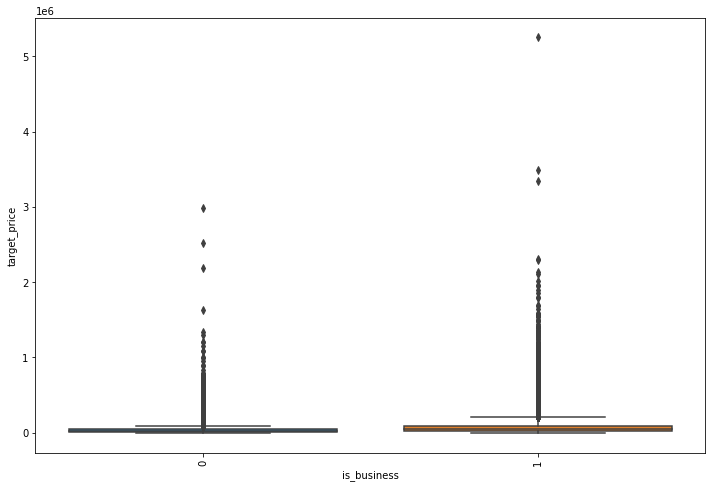

In [37]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'is_business', y = 'target_price' )
plt.xticks(rotation=90 )

Target prices of buisness vehicles seem to ge generally greater than normal vehicles.

In [38]:
df4 = df.dropna(how = 'any', axis = 0)

In [39]:
df.shape

(206207, 11)

In [40]:
df4.shape

(201971, 11)

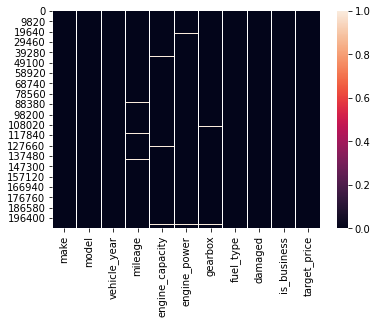

In [41]:
sns.heatmap(df.isna())

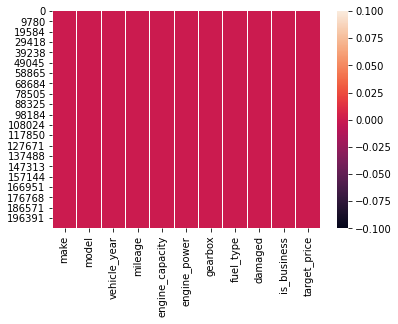

In [42]:
sns.heatmap(df4.isna())

# Aproach 1: 
## straightforward one hot encoding of categorical features and then training a randomforest.

Missing data dropped

In [43]:
make_encoding = pd.get_dummies(df4['make'] , prefix='make')

In [44]:
model_encoding = pd.get_dummies(df4['model'] , prefix='model')

In [45]:
year_encoding = pd.get_dummies(df4['vehicle_year'] , prefix='year')

In [46]:
gearbox_encoding = pd.get_dummies(df4['gearbox'] , prefix='gear')

In [47]:
fuel_type_encoding = pd.get_dummies(df4['fuel_type'] , prefix='fuel')

In [48]:
frames = [make_encoding, model_encoding , year_encoding, gearbox_encoding, fuel_type_encoding ]
onehot_encoded = pd.concat(frames, axis = 1)

In [49]:
onehot_encoded.shape

(201971, 1361)

In [50]:
df4.shape

(201971, 11)

In [51]:
final = pd.concat([df4[["mileage", "engine_capacity", "engine_power", "damaged", "is_business"]], onehot_encoded], axis = 1)

In [52]:
final.shape

(201971, 1366)

In [53]:
final['target_price'] = df4['target_price']

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
X, y = final.iloc[:, :-1], final.iloc[:, -1]

In [56]:
X.shape

(201971, 1366)

In [57]:
y.shape

(201971,)

In [58]:
# standardization
trans = StandardScaler()
X_std = trans.fit_transform(X)

In [59]:
X_std.shape

(201971, 1366)

In [ ]:
# random search cross val
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50,100]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs=4)

In [60]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(135320, 1366) (66651, 1366) (135320,) (66651,)


In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 161.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=50)

In [ ]:
rf_random.best_score_

0.8903129610515611

In [61]:
# training randomforest regressor with best parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=50)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
pred = rf.predict(X_test)

In [63]:
# r-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)

In [64]:
r2

0.9016031843904291

In [65]:
# mean squared error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, pred)

In [66]:
rmse

658991811.6486063

In [67]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)

In [68]:
mae

8311.998799322744

# Approach 2
## Ordinal encoding of categorical features and training GBDT regressor on it

## Defining class to extract features and returning feature extracted data

In [83]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 170kB/s 


In [4]:

class RfFeatureExtractor(object):
    def __init__(self):
        self.categorical_features = ['make', 'model', 'vehicle_year', 'gearbox', 'damaged', 'is_business']
        self.real_valued_features = ['mileage', 'engine_capacity', 'engine_power']
        self.tarscalar = StandardScaler()
        self.catencoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        
    def fit(self, df):
        data = df[self.real_valued_features].values
        self.tarscalar.fit(data)

        data = df[self.categorical_features].values
        self.catencoder.fit(data)

    def transform(self, df):
        data = df[self.real_valued_features].values
        real_data = self.tarscalar.transform(data)
        print(f'Real valued data', real_data.shape)
        
        data = df[self.categorical_features].values
        cat_data = self.catencoder.transform(data)
        print(f'Categorical valued data', cat_data.shape)
        tdata = np.concatenate((real_data, cat_data), axis=1)

        return tdata

In [5]:
df = pd.read_csv('./otomoto_price_prediction_data.csv')
tnum = df.shape[0]
df.dropna(inplace=True)
print(f'Dropped {tnum - df.shape[0]} rows')
df, val_df = train_test_split(df, test_size=0.2, random_state=42)

Dropped 4236 rows


In [18]:
y = df.target_price.tolist()
mean, std = np.mean(y), np.std(y)
y_std = (y - mean) / std

In [19]:
y_val = val_df.target_price.tolist()
y_val = (y_val - mean) / std

In [20]:
rffeat = RfFeatureExtractor()
rffeat.fit(df)
X = rffeat.transform(df)

Real valued data (161576, 3)
Categorical valued data (161576, 6)


In [21]:
X_val = rffeat.transform(val_df)

Real valued data (40395, 3)
Categorical valued data (40395, 6)


In [11]:
rfreg = GradientBoostingRegressor(  #RandomForestRegressor(
    n_estimators=500, criterion='mse', max_depth=5, min_samples_split=2,
    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
    random_state=42, verbose=100,
)

In [ ]:
rfreg.fit(X, y_std)

In [22]:
pred = rfreg.predict(X_val)

In [23]:
# r-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_val, pred)

In [24]:
r2

0.915950953303917

In [25]:
# mean squared error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_val, pred)

In [26]:
rmse

0.0779157647997416

In [27]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, pred)

In [28]:
mae

0.10136172712936377

# So evidently GBDT regressor with ordinal encoding of categorical features performs better than RandomForest regressor with one hot encoding